In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('retention.csv')
df.head(10)

,Att_hrs_fall,GENDER,HIGH_SCHOOL_PERCENTILE,AGE,Att_hrs_spr,Avg_income,Distance,Dropped_course,Major_rate,SAT,...,Legacynum,Stu_worker_ind,Need_pct_met,Perc_hrs_comp_fall,Hs_rate,Dorm_rate,Instate,Transcrip,Fall_GPA,Target
0,13,F,97.0,18.91,15,30573.0,5.083094,0,0.821782,1160,...,0,0,1.000000,1.000000,0.812500,0.8,1,0,3.307692,0
1,14,M,97.0,18.04,15,27305.0,2.198764,0,0.795455,1050,...,0,0,0.977366,1.000000,1.000000,0.8,1,1,2.821429,0
2,15,M,83.0,18.16,15,30573.0,5.083094,0,0.843750,1140,...,1,0,0.913965,1.000000,0.812500,0.8,1,0,3.133333,0
3,14,M,92.0,18.59,12,35865.0,3.245574,0,NaN,1090,...,0,1,1.000000,1.000000,0.847826,0.8,1,0,2.678571,0
4,16,F,80.0,18.88,16,40125.0,19.486585,0,0.840391,1150,...,0,1,1.000000,1.000000,0.875000,0.8,1,0,2.500000,0
5,18,F,NaN,18.64,16,45371.0,52.470435,1,0.829515,1320,...,0,0,0.974919,0.833333,0.875000,0.8,1,0,3.000000,0
6,12,F,64.0,18.79,14,40323.0,189.876503,0,0.831511,960,...,0,0,1.000000,1.000000,0.750000,0.8,1,0,2.027778,0
7,15,F,75.0,18.34,15,35865.0,3.245574,0,0.916667,1350,...,0,0,1.000000,1.000000,NaN,0.8,1,0,3.800000,0
8,12,F,83.0,19.27,13,39779.0,18.380676,0,0.865385,940,...,1,0,1.000000,1.000000,0.850000,0.8,1,1,3.333333,0
9,12,M,46.0,19.19,13,30573.0,5.083094,0,0.829268,1010,...,1,1,1.000000,1.000000,NaN,0.8,1,0,2.100000,0


# Page (3-32)

**1. How many rows (observations) are there?**

In [20]:
#Part 1-q1
print(f'There are {df.shape[0]} observations')

There are 2626 observations


**2. How many columns (variables) does the Retention table have?** 

In [24]:
#Part 1-q2
print(f'There are {df.shape[1]} columns')

There are 21 columns


**3. When you're analyzing the variables, what are some basic ways you can figure out their roles and types (e.g., categorical, numeric)?**

In [26]:
#Part 1-q3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Att_hrs_fall            2626 non-null   int64  
 1   GENDER                  2626 non-null   object 
 2   HIGH_SCHOOL_PERCENTILE  2363 non-null   float64
 3   AGE                     2626 non-null   float64
 4   Att_hrs_spr             2626 non-null   int64  
 5   Avg_income              2469 non-null   float64
 6   Distance                2528 non-null   float64
 7   Dropped_course          2626 non-null   int64  
 8   Major_rate              2547 non-null   float64
 9   SAT                     2626 non-null   int64  
 10  Extra_curr              2626 non-null   int64  
 11  Legacynum               2626 non-null   int64  
 12  Stu_worker_ind          2626 non-null   int64  
 13  Need_pct_met            2626 non-null   float64
 14  Perc_hrs_comp_fall      2626 non-null   

In [28]:
#Part 1-q3
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("Target", axis=1)
y = df["Target"]

# Label encode categorical variable
X_encoded = X.copy()
le= LabelEncoder()
X_encoded["GENDER"] = le.fit_transform(X["GENDER"])

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

kbest = SelectKBest(score_func=f_classif, k=5)
X_kbest = kbest.fit_transform(X_imputed, y)
selected_kbest = X_imputed.columns[kbest.get_support()]
print("Top 5 features using SelectKBest:", list(selected_kbest))

Top 5 features using SelectKBest: ['HIGH_SCHOOL_PERCENTILE', 'Perc_hrs_comp_fall', 'Dorm_rate', 'Transcrip', 'Fall_GPA']


# (Page 3-36)

**1. What happens when a column has missing values? Are they automatically removed by Python?**

In [20]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

rows_after_dropping = df.dropna().shape[0]
print(f"\nRows remaining after dropping missing values: {rows_after_dropping} out of {len(df)}")

missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage[missing_percentage > 0])  

Missing values in each column:
Att_hrs_fall                0
GENDER                      0
HIGH_SCHOOL_PERCENTILE    263
AGE                         0
Att_hrs_spr                 0
Avg_income                157
Distance                   98
Dropped_course              0
Major_rate                 79
SAT                         0
Extra_curr                  0
Legacynum                   0
Stu_worker_ind              0
Need_pct_met                0
Perc_hrs_comp_fall          0
Hs_rate                   805
Dorm_rate                   0
Instate                     0
Transcrip                   0
Fall_GPA                    0
Target                      0
dtype: int64

Rows remaining after dropping missing values: 1563 out of 2626

Percentage of missing values in each column:
HIGH_SCHOOL_PERCENTILE    10.015232
Avg_income                 5.978675
Distance                   3.731912
Major_rate                 3.008378
Hs_rate                   30.654989
dtype: float64


## Explanation:

This code checks for missing values in the dataset. It uses `isnull().sum()` to count missing values in each column, calculates how many rows would remain if missing data were dropped with `dropna()`, and computes the percentage of missing values in each column.

## Answer to the question:

No, pandas (the Python library used here) does not automatically remove missing values. They remain as `NaN` unless explicitly handled. This means analysts must decide whether to drop, impute, or otherwise manage these values.

**2. Are any numeric columns actually categorical (based on few unique values)?**

In [22]:
numeric_desc = df.select_dtypes(include='number').describe()
print("Descriptive statistics of numeric columns:")
print(numeric_desc)

print("\nUnique value counts per numeric column:")
for col in df.select_dtypes(include='number').columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

print("\nPotential categorical numeric columns (fewer than 10 unique values):")
for col in df.select_dtypes(include='number').columns:
    if df[col].nunique() < 10:
        print(f"{col} might be categorical")

Descriptive statistics of numeric columns:
       Att_hrs_fall  HIGH_SCHOOL_PERCENTILE          AGE  Att_hrs_spr  \
count   2626.000000             2363.000000  2626.000000  2626.000000   
mean      14.612719               79.091071    18.553679    14.865956   
std        1.389914               19.434681     0.584624     1.625372   
min        3.000000                0.600000    16.860000     4.000000   
25%       14.000000               68.000000    18.270000    14.000000   
50%       15.000000               86.000000    18.540000    15.000000   
75%       16.000000               95.000000    18.810000    16.000000   
max       19.000000              100.000000    39.430000    20.000000   

          Avg_income     Distance  Dropped_course   Major_rate          SAT  \
count    2469.000000  2528.000000     2626.000000  2547.000000  2626.000000   
mean    58521.582017   260.155720        0.071592     0.836452  1178.313024   
std     23475.953076   343.951562        0.324575     0.021735

## Explanation:

The code describes numeric columns, counts the number of unique values in each, and identifies those with fewer than 10 unique values as potentially categorical.

## Answer to the question:

Yes, numeric columns with a small number of unique values (e.g., less than 10) may actually be categorical variables. These could represent categories encoded as numbers and should be reviewed before modeling.

**3. Is there a rule for how many unique values define a column as categorical?**

In [24]:
print("\nUnique value counts for all columns (numeric + non-numeric):")
unique_counts = df.nunique().sort_values()
print(unique_counts)


Unique value counts for all columns (numeric + non-numeric):
Target                       2
GENDER                       2
Transcrip                    2
Instate                      2
Stu_worker_ind               2
Legacynum                    2
Extra_curr                   5
Dropped_course               6
Att_hrs_spr                 13
Att_hrs_fall                13
Dorm_rate                   17
Major_rate                  46
Perc_hrs_comp_fall          71
SAT                         82
Hs_rate                     87
HIGH_SCHOOL_PERCENTILE      94
AGE                        236
Need_pct_met               323
Fall_GPA                   496
Avg_income                 945
Distance                  1000
dtype: int64


## Explanation:

This code counts the number of unique values in all columns using `nunique()` and sorts them. It provides a basis for assessing whether a column might be categorical or continuous.

## Answer to the question:

There is no strict rule in Python or pandas about how many unique values define a categorical column. However, a common heuristic is that columns with fewer than 10–20 unique values may be considered categorical. Ultimately, the decision depends on data context and usage.

# (Page 3‑34)

In [51]:
%matplotlib inline

• How many input features vs. target variables? *Answer:* 20 input features and 1 target variable

• Of the inputs, how many are nominal (categorical)? *Answer:* There are 7 nominal input features

• Are any variables being rejected? *Answer:* Each one is unique so there is none to reject

• When sampling for exploration, what limits the “fetch” size? Typical value? *Answer:* When sampling for exploration in a Jupyter Notebook, the "fetch" size is primarily limited by your computer's available RAM, as well as CPU and disk I/O. It dictates how much data is loaded into memory at one time. While there isn't a universal default for general data loading, some database cursors or specific data connectors might have a small default fetch size, often around 5 rows, to minimize initial memory consumption, requiring explicit configuration for larger batches.

In [55]:
# Assumption on "target" variable as the target variable and all else is others
all_columns = set(df.columns)
targets = {'Target'} & all_columns
features = list(all_columns - targets)

print(f"Features ({len(features)}): {features}")
print(f"Targets ({len(targets)}): {targets}")

# Code to count the nominal among the input features
nominal = [col for col in features if df[col].nunique() <= 10]
print(f"\nNominal (<=10 unique) features ({len(nominal)}): {nominal}")

Features (20): ['AGE', 'Major_rate', 'Perc_hrs_comp_fall', 'Transcrip', 'SAT', 'Legacynum', 'Hs_rate', 'Att_hrs_spr', 'Stu_worker_ind', 'Distance', 'Instate', 'Dorm_rate', 'HIGH_SCHOOL_PERCENTILE', 'GENDER', 'Att_hrs_fall', 'Need_pct_met', 'Fall_GPA', 'Avg_income', 'Dropped_course', 'Extra_curr']
Targets (1): {'Target'}

Nominal (<=10 unique) features (7): ['Transcrip', 'Legacynum', 'Stu_worker_ind', 'Instate', 'GENDER', 'Dropped_course', 'Extra_curr']


In [16]:
# Testing the maximum size of a fetch
sample = df.sample(n=500, random_state=42)
sample.head()

,Att_hrs_fall,GENDER,HIGH_SCHOOL_PERCENTILE,AGE,Att_hrs_spr,Avg_income,Distance,Dropped_course,Major_rate,SAT,...,Legacynum,Stu_worker_ind,Need_pct_met,Perc_hrs_comp_fall,Hs_rate,Dorm_rate,Instate,Transcrip,Fall_GPA,Target
221,17,F,99.0,18.66,16,31087.0,32.651935,0,0.795455,1300,...,1,0,0.847511,1.0,NaN,0.804103,1,1,2.941176,0
318,15,F,95.0,18.00,16,53131.0,325.178481,0,0.831585,1340,...,0,0,1.000000,1.0,NaN,0.804103,0,1,4.000000,0
926,15,M,78.0,17.42,15,87290.0,82.459651,0,0.831511,1130,...,0,1,1.000000,1.0,0.909091,0.878319,1,0,3.200000,0
1352,16,F,87.0,19.28,16,83078.0,150.084701,0,0.882353,1220,...,0,0,0.828786,1.0,0.866667,0.846564,1,1,4.000000,0
1801,16,M,95.0,18.00,16,87290.0,82.459651,0,0.863636,1330,...,0,0,1.000000,1.0,0.750000,0.878319,1,1,3.812500,0


# **(Page 3-36)**

**1) Let’s create a bar plot for the GENDER variable. How many students are male versus female? What percentage of the students are female?**

In [61]:
#Count Gender distribution for all students
gender_counts=df['GENDER'].value_counts()
print("=== Gender counts ===")
gender_counts

=== Gender counts ===


GENDER
F    1582
M    1044
Name: count, dtype: int64

## Explanation
This code calculates and displays the gender distribution among students in the dataset. Here's a step-by-step explanation:

 `gender_counts=df['GENDER'].value_counts()` - This line:
   - Accesses the 'GENDER' column from the DataFrame 'df'
   - Applies the `value_counts()` method, which counts the occurrences of each unique value in the column
   - Stores the resulting Series in a variable called 'gender_counts'

This code is useful for getting a quick summary of how many students belong to each gender category in the dataset.

In [66]:
# Calculate percentage of female students

female_percentage = (gender_counts.get('F',0) / gender_counts.sum()) * 100
print("\nPercentage of female students:",female_percentage.round(3))



Percentage of female students: 60.244


# Explanation
This code calculates and displays the percentage of female students. 

 `female_percentage = (gender_counts.get('F',0) / gender_counts.sum()) * 100` - This line:
   - Uses `.get('F',0)` to retrieve the count of female students (with key 'F') from the `gender_counts` Series
   - If 'F' doesn't exist in the Series, it returns 0 as the default value
   - Divides this count by the total number of students (obtained with `gender_counts.sum()`)
   - Multiplies by 100 to convert the ratio to a percentage


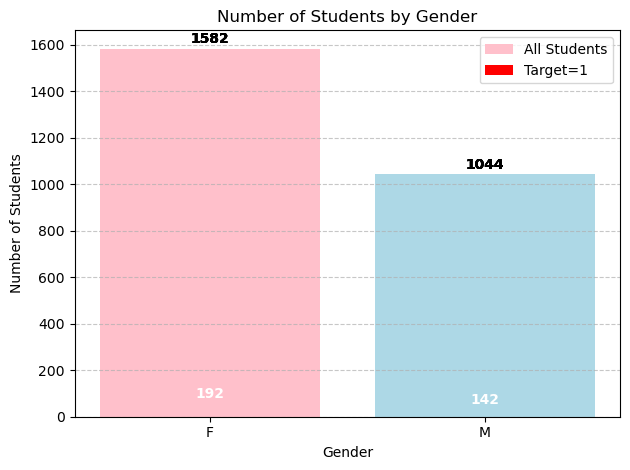

In [87]:
# Create bar plot
bars = plt.bar(gender_counts.index, gender_counts.values, color = ['pink','lightblue'])
plt.title('Number of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.grid (axis='y', linestyle = '--', alpha=0.7)
plt.tight_layout()  #adjust the spacing of plot elements to ensure they don't overlap

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}',
        ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

**It can be seen that, out of the total of 2626 students. 1582, approximately 60% are female while the remaining 1044 are male.**

## Explanation
This code creates a bar chart showing the number of students by gender. Here's a step-by-step explanation:

1. `bars = plt.bar(gender_counts.index, gender_counts.values, color = ['pink','lightblue'])` - Creates a bar plot using the index of gender_counts as x-values and the values as heights, with pink and light blue colors for the bars.

2. `plt.title('Number of Students by Gender')` - Adds a title to the plot.

3. `plt.xlabel('Gender')` and `plt.ylabel('Number of Students')` - Add labels to the x and y axes.

4. `plt.grid(axis='y', linestyle = '--', alpha=0.7)` - Adds horizontal grid lines with a dashed style and 70% opacity.

5. `plt.tight_layout()` - Adjusts the spacing between plot elements to prevent overlapping.

6. The for loop iterates through each bar to add text labels:
   - Gets the height of each bar
   - Adds text above each bar showing the count value
   - Centers the text horizontally over each bar
   - Positions the text 10 units above the bar
   - Sets font size to 10 and makes it bold

**2) For students where Target=1, highlight them on the same bar plot.**

In [78]:
print('===Number of Male and Female Students when Target is 1 ===')
Target1 = df[df['Target'] == 1]
gender_counts_target1 = Target1['GENDER'].value_counts()
gender_counts_target1

===Number of Male and Female Students when Target is 1 ===


GENDER
F    192
M    142
Name: count, dtype: int64

# Explanation
This code analyzes and displays the gender distribution among students where the 'Target' value is 1. 

1. `Target1 = df[df['Target'] == 1]` - This creates a new DataFrame called 'Target1' that contains only the rows from the original DataFrame 'df' where the 'Target' column has a value of 1.

2. `gender_counts_target1 = Target1['GENDER'].value_counts()` - This counts the occurrences of each unique value in the 'GENDER' column of the 'Target1' DataFrame and stores the result in 'gender_counts_target1'.

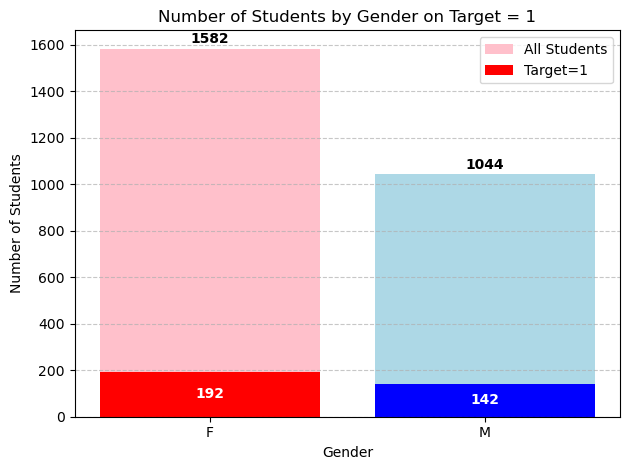

In [89]:
# Plotting the Gender against its count 
bars = plt.bar(gender_counts.index, gender_counts.values, color = ['pink','lightblue'], label= 'All Students')

#Plotting the Gender against its count when target is 1
bars_Target1 = plt.bar(gender_counts_target1.index, gender_counts_target1.values, color = ['red', 'blue'], label= 'Target=1')

plt.title('Number of Students by Gender on Target = 1')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend()
plt.grid (axis='y', linestyle = '--', alpha=0.7)
plt.tight_layout()  #adjust the spacing of plot elements to ensure they don't overlap

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}',
        ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars_Target1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{int(height)}',
        ha='center', va='center', fontsize=10, fontweight='bold', color = 'white')

# Saving plot as an image
plt.savefig("gender_comparison_plots.png", dpi=300)

plt.show()

**The bar chart shows students by gender and identifies those in Target = 1. It can be observed from the chart that there are more female students (1,582) than male students (1,044) in the dataset provided. Among them, 192 females and 142 males are included in Target = 1. Even though women are more numerous than men, the proportion of Target = 1 is slightly higher among males (13.6%) than for women (12.1%). This suggests that, in comparison to each group's numbers, male students are slightly more likely to fall within the Target = 1 category, which may warrant further investigation depending on what the target variable represents.**

# Explanation

This code creates a bar chart comparing gender counts for all students and for students with Target=1, then adds annotations and saves the plot. Here's a step-by-step breakdown:

1. `bars = plt.bar(gender_counts.index, gender_counts.values, color = ['pink','lightblue'], label= 'All Students')` Creates the first set of bars, showing the total number of students by gender (F and M).
   - bars stores references to these bars so we can label them later.

2. `bars_Target1 = plt.bar(gender_counts_target1.index, gender_counts_target1.values, color = ['red', 'blue'], label= 'Target=1')`  Creates a second set of bars showing gender counts only for students with Target=1
   - These bars are drawn on top of the previous ones.

3. The code adds plot elements:
   - Title, x-label, y-label, and legend
   - Grid lines on the y-axis with dashed style
   - `tight_layout()` to prevent overlapping elements
     
4. Two loops add text annotations to the bars:
   - First loop adds the count values above each bar in the "All Students" group
   - Second loop adds the count values in the middle of each bar in the "Target=1" group with white text
     
5. Finally, it saves the plot as a PNG image file named "gender_comparison_plots.png" with a resolution of 300 DPI (dots per inch).

# **(Page 3-37)**

**1) Finally, create a histogram for the Avg_income column. Use 20 bins to group the data.**

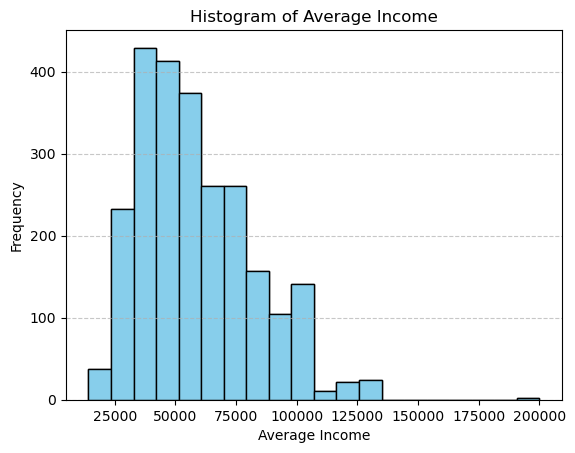

In [95]:
plt.hist(df['Avg_income'], bins=20, color = 'skyblue', edgecolor='black')
plt.title('Histogram of Average Income')
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) # To generate gridlines
plt.savefig("Avg_Income Histogram.png", dpi = 300) # Save it as an image

plt.show()

## Explanation
The selected code creates and customizes a histogram visualization of average income data. Here's a step-by-step explanation:

1. `plt.hist(df['Avg_income'], bins=20, color='skyblue', edgecolor='black')` - Creates a histogram of the 'Avg_income' column from a dataframe, with 20 bins, skyblue fill color, and black edges.

2. `plt.title('Histogram of Average Income')` - Adds a title to the histogram.

3. `plt.xlabel('Average Income')` - Labels the x-axis.

4. `plt.ylabel('Frequency')` - Labels the y-axis.

5. `plt.grid(axis='y', linestyle='--', alpha=0.7)` - Adds dashed gridlines on the y-axis with 70% opacity.

6. `plt.savefig("Avg_Income Histogram.png", dpi=300)` - Saves the plot as a PNG image file with a resolution of 300 dots per inch.